# N-Asset Efficient Frontier

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
import edhec_risk_kit as erk

In [3]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [4]:
from scipy.optimize import minimize

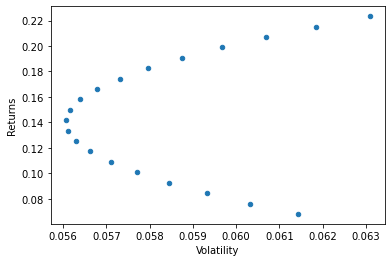

In [5]:
l = ["Games", "Fin"]
erk.plot_ef2(20, er[l], cov.loc[l, l])

In [13]:
import numpy as np

def minimize_vol(target_return, er, cov):
    """
    target return -> weight vector (W)
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1),) * n
    return_is_target = {
        'type': 'eq',
        'args': (er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    results = minimize(
        erk.portfolio_vol, 
        init_guess, 
        args=(cov,), 
        method="SLSQP", 
        options={'disp': False}, 
        constraints=(return_is_target, weights_sum_to_1),
        bounds=bounds
    )
    return results.x

In [14]:
w15 = minimize_vol(0.15, er[l], cov.loc[l, l])
vol15 = erk.portfolio_vol(w15, cov.loc[l, l])
vol15

0.056163669406706564

In [15]:
w15

array([0.47287631, 0.52712369])

In [18]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l, l])
vol15 = erk.portfolio_vol(w15, cov.loc[l, l])
vol15

0.056163669406706564

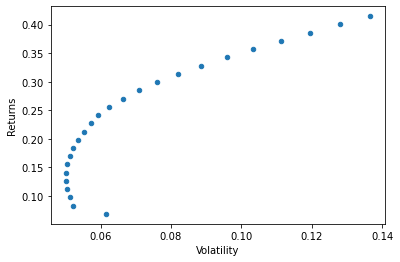

In [21]:
l = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_ef(25, er[l], cov.loc[l, l])